# Homework 1 Practicum (35 Points)
### Version 1.0 (September 13, 2021)





```
# This is formatted as code
```
Partner 1: Chang Yan (cyan13), Partner 2: Jingguo Liang (jliang35)

**Instructions:**
This notebook is intended to guide you through creating and exploring your dataset. Please answer all questions in this notebook (you will see <font color='blue'>TODO</font> annotations for where to include your answers). At the beginning of each part, we will bullet the expected deliverables for you to complete. All questions can be answered in 1-4 sentences, unless otherwise noted.

Please <font color='blue'>make a copy of this notebook in your own drive</font> before you make any edits. You can do so through File -> Save a copy in Drive

## Part 1: Defining the Problem and Choosing a Dataset 
Things to do in this part:
1. Answer questions 1-5
2. Identify data sources to use in your dataset
3. List data sources used in question 5

Your first task is to choose a problem you're interested in. You are free to choose from any domain, but it should be within the **supervised learning** paradigm. In other words, a supervised classifier should be able to generalize from a training sample of $(X,y)$ pairs to predict outcomes on unseen data $x$. We want to use machine learning, so your problem should be difficult to solve using traditional programming algorithms. 

For simplicity, you will construct data for a binary or multiclass classification problem, where the possible labels are given by a fixed set of choices, or for a regression task (real-valued labels). Do not build a dataset for a structured prediction task.


#### 1) In one or two sentences, what are you interested in predicting given what data? This is your supervised learning problem. 

You should answer this question before creating your dataset, as it will provide an indication of what to search for.

<font color='blue'>
The data is a set of 2D 28*28 black and white images, each represents one of 0-9 hand-written digits. The target I want to predict is the corresponding digit given each image. 
</font>

#### 2) Is this a well-defined problem? Why or why not? What ambiguities (if any) exist in your problem? 

Think about what challenges you solved by formulating the problem in this way.

<font color='blue'>
    The problem is well defined. First, the task is to find the label Y (0-9) of each image X, and both X and Y are clear and well defined. Second, each input X (the image) has a unique label Y (digit 0-9). Third, the performance can be measured by comparing the predicted Y to the actual Y. Last, we have a large data set (becasue a large number of such images are available) that can be used for the algorithm to gain experience.
</font>

#### 3) Does an easy (non-ML) solution exist for the problem? What are existing ways this problem, or a similar problem, is addressed (regardless of difficulty)? 

<font color='blue'>
    As far as I know, there does not exist any accurate non-ML solution. There do have some methods, like doing registration onto standard digits, but they perform poorly. Those hand-written digits vary very much in shape and positions, so traditional algorithms are hard to classify it. Similar problem to this is pattern recognition, which is commonly addressed using ML methods.
</font>

#### 4) Why is using machine learning for this problem justified? 

<font color='blue'>
    Because this problem is well defined for learning, and all non-ML solutions performs badly on this problem. Also, image data itself is more suitable for ML as we need to recognize the patterns in the image, which can be hardly done using other methods. It has a well-defined dataset of the same number of features, and the dataset is relatively large. A set of labels is also provided for each data point, making supervised learning possible.
</font>

Now, we'll turn to data we can use to actually solve your problem. You may wish to use Section 3.1 of the assignment sheet for inspiration. **Remember, you are expected to *create* a dataset, not use an existing one**.

#### 5) List the source of data you used (if more than one) when creating your dataset along with (very briefly) what you obtained from it.

<br /> Obtained features: 28*28 images from http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz. <br /> Obtained labels from http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz.

<font color='blue'>
     <br /> Obtained features: 28*28 images from http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz. <br /> Obtained labels from http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz. <br />
    I obtained 60000 28*28 images files of hand-written digits from them (They are in one binary file and I need to extract them). There is also another file containing the labels which is also a binary file I need to decode.
</font>

## Part 2: What does the data look like?
Things to do in this part:
1. Answer questions 6-11
2. Print a few examples of raw data (if possible) otherwise explain what the raw data looks like.
3. Create at least 3 numerical features from your raw data
4. Create dataset such that $X\in\mathbb{R}^{m\times n}$ and $y\in\mathbb{R}^m$ are both numpy arrays
5. Create 1 visual that helps you understand your data.

Let's take a look at the various data you've collected. First let's read in the raw data. You may read the data into whatever is most convenient (e.g. a list, a numpy array, a Pandas dataframe, etc.). **At this point your data will be in whatever format you downloaded them in**. For example, if you're working with text data, your data might be strings of words or collection of text documents. If you are working with image data, you might have a collection of images.
<br /><br />
For those of you new to working with data in Python, we have included examples of how to import the raw data. These are merely suggestions if they work for you. You don't have to use them.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
# # Suppose you have a directory called documents that contains Wikipedia articles, you can process these as follows:
# # Cleaning the data (e.g. removing stop words) is not required.
# import os
# from collections import defaultdict

# files = [f for f in os.listdir('documents') if os.path.isfile(os.path.join('documents', f))
# X = defaultdict(list)
# for i, file in enumerate(files[:len(files)], start=1):
#     with open(os.path.join('documents', file)) as f:
#         X['doc_' + str(i)] = f.readlines()
# # X is a dictinary that maps doc_id to text.

# # Suppose you have labels that are stored in a CSV file:
# import pandas as pd

# y = pd.read_csv('labels.csv')
# # y is a Pandas dataframe that contains each label.

# # Suppose you have a directory called images that contains pictures of cats, you can process them as follows:
# from PIL import Image

# images = [f for f in os.listdir('images') if os.path.isfile(os.path.join('images', f))
# X = [Image.open(image) for image in images]
# # X is a list of PIL Image objects

#######################################################
# TODO: Read in your raw data
import numpy as np
f = open('/content/drive/MyDrive/train-labels.idx1-ubyte', 'rb') # opening the label binary file
content = f.read() # reading all lines
# the labels start at positon 8 and has total of 60000 ones
y = np.zeros(60000)
for i in range(60000):
    y[i] = content[i+8]
f = open('/content/drive/MyDrive/train-images.idx3-ubyte', 'rb') # opening the data binary file
content = f.read() # reading all lines
# the images start at postion 16 and each is 28*28
X = np.zeros((60000, 28, 28))
for i in range(60000):
    temp = content[i*28*28+16: (i+1)*28*28+16]
    array = np.zeros(28*28)
    for j in range(28*28):
        array[j] = temp[j]
    X[i] = np.reshape(array,(28,28))
#######################################################

Now, let's print a few examples. Depending on your data format, you may have to write this yourself. We have provided some examples below. 

image:


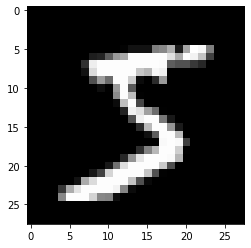

label: 5.0
image:


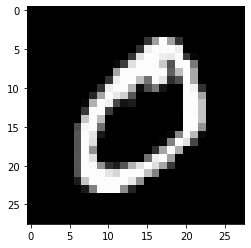

label: 0.0
image:


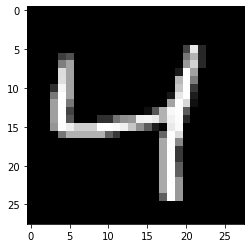

label: 4.0
image:


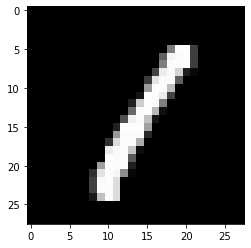

label: 1.0
image:


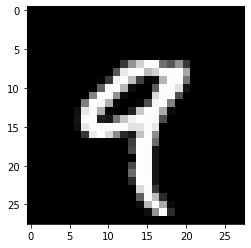

label: 9.0


In [35]:
# # If your data is stored in an array:
# print('X:', X[:5])
# print('y:', y[:5])

# # If your data consists of image files:
# from PIL import Image

# for i in range(5):
#     print('image:')
#     img = X[i]
#     img.show()
#     print('label:', y[i])

#######################################################
# TODO: print out what a few examples of your raw data.
import matplotlib.pyplot as plt 
for i in range(5):
    print('image:')
    plt.imshow(X[i], cmap = "gray")
    plt.show()
    print('label:', y[i])
#######################################################

#### (Optional) If your raw data format can't be displayed in a Jupyter notebook (e.g. video or audio files), you may skip the above step. You should still look at the raw data in whatever way possibly, but instead just describe what the raw data is that you look at.

<font color='blue'>
    TODO: replace this cell with your answer. Leave blank if not applicable.
</font>

#### 6) What information is contained in each example (row) in $X$? These are your raw data features.

<font color='blue'>
    The information contained in X is the intensity of each pixel in the 28*28 image. There is are total of 28*28 = 784 features, they are all grayscale intensities.
</font>

If your data is not numerical, this will be difficult for an algorithm to learn directly. So, now that you've seen what the raw data looks like, if you have non-numerical features, you would need to extract *numerical* features from the raw data.
<br /><br />
We can obtain numeric features through a process called **feature engineering**. Features may be derived from the existing raw data or may come from other data sources that can be associated with each example. This is a challenging task that often requires domain knowledge about the problem you are trying to solve. 
<br /><br />
While very important in dataset creation, feature engineering is not the focus of this assignment. You can choose to exclude the non-numeric features from your dataset or you can try feature engineering or you may choose work with a simpler dataset. One example of feature engineering is provided below. 
<br /><br />

In [ ]:
# # If you're using text data stored in a dictionary (like example above):
# # Suppose each document is a string that contains a period
# # and are trying to predict end of sentences (EOS),
# import re
# import pandas as pd
# from collections import defaultdict

# # Convert X from doc_id -> text to doc_id -> {sentence, features}
# X = {k:{'sentence': v, 'features': None} for k,v in X.items()}

# # suppose you downloaded these external data: common abbreviations, titles (e.g. mr, ms, dr), month abbreviations (e.g. sept, oct)
# abbrevs = pd.read_csv('common_abbrevs.csv')
# titles = pd.read_csv('titles.csv')
# months = pd.read_csv('month_abbrevs.csv')

# # for the purpose of this example, assume all documents have len > 3
# features = defaultdict(int)
# for doc_id, doc in X.items():
#     idx = re.find('.')
#     one_before = doc['sentence'][idx - 1] if idx > 0 else None
#     one_after = doc['sentence'][idx + 1] if idx < len(doc['sentence']) - 1 else None
#     features['is_abbrev'] = 1 if one_before and one_before in abbrevs else 0
#     features['is_title'] = 1 if one_before and one_before in titles else 0
#     features['is_month'] = 1 if one_before and one_before in months else 0
#     features['is_decimal'] = 1 if one_before and one_after in one_before.isdigit() and one_after.isdigit() else 0
#     features['other_punc'] = 1 if any((p in '?!.') for c in doc['sentence'][idx:]) else 0
#     features['period_loc'] = idx
#     X[doc_id]['features'] = features
# # In just a few lines of Python, we created 6 features!

Next, let's focus on what you're trying to predict. First, let's see what the potential outcomes look like. 

In [36]:
import numpy as np

np.unique(y)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

#### 7) Is your dataset suitable for a regression or classification task? Explain.

<font color='blue'>
    This is a classification task as the outcomes are 10 discrete integer values, meaning 10 classes, no other values allowed. So, we are trying to classify the images into 10 classes, which is a classification task.
</font>

Now, we'll standardize our data as follows. The data matrix $X$ should be a numpy 2d array in $\mathbb{R}^{m\times n}$. The labels should be a numpy 1d array in $\mathbb{R}^m$. $m$ is the number of examples and $n$ is the number of features. **You will be training your supervised classifer on the features, which may not include all (or any) of the raw data**. This is a decision you will make when creating your dataset.
<br /><br />
Note: this is the format we're looking for your data to be in when you submit your dataset (i.e. $X\in\mathbb{R}^{m\times n}$ and $y\in\mathbb{R}^m$ and are both numpy arrays).

In [38]:
# # Now, using your numerical features from the previous step, you can construct the dataset.
# # Depending on what your raw data was (i.e. if any field was numerical), you may include this in the final dataset
# # or you may just use the features you created. 

# # Using the dictionary from above (doc_id -> {sentence, features}) the dataset can be constructed
# import numpy as np

# X = np.array([np.array(doc.features.values()) for doc in X.values()])
# y = np.array(y) # assume y was a list of binary labels previously

#######################################################
# TODO: Convert X and y to numpy arrays with appropriate dimensions
X = np.reshape(X, (60000, 28*28))
y = y
#######################################################

If you have a classification dataset, let's look at class balance. This tells us how many examples we have for each label.

In [39]:
for i in np.unique(y):
    print(f'{len(y[y==i])} examples of class {i}')

5923 examples of class 0.0
6742 examples of class 1.0
5958 examples of class 2.0
6131 examples of class 3.0
5842 examples of class 4.0
5421 examples of class 5.0
5918 examples of class 6.0
6265 examples of class 7.0
5851 examples of class 8.0
5949 examples of class 9.0


#### 8) Classification: Is your dataset balanced or imbalanced?


Regression: How are your labels distributed? Normal distrbution? Uniform within a range? etc. 

<font color='blue'>
    The dataset is roughly balanced, as we can see, each class have roughly 6000 cases, and no class has <5000 or >7000 cases.
</font>

Let's compute some statistics for the dataset.

In [40]:
#######################################################
print(f'Number of examples: {X.shape[0]}')
print(f'Number of features per example: {X.shape[1]}')
# there are many more that are relevant to the specific domain your data is in.
# TODO: if applicable, please include any additional dataset statistics here
#######################################################

Number of examples: 60000
Number of features per example: 784


#### 9) Do you have lot's of high quality data? Explain any limitations (if any) that exist in terms of data quantity and quality.

<font color='blue'>
    I believe I do have high quality data. First, the images are of the same size and the intensities are of the same sacle. Second, although they are in a low resolution (only 28*28) with a bit blurry, each digits can be clearly distinguished by human eye, and the boundaries are clear. Third, we have a large size of Data, which is 60000. One limitation maybe that some images are not centered, i.e. the digit at not exactly on the center of image, and sometimes there are more empty on one side than the other side.
</font>

Data visualizations help us understand our data and draw insights. Just like there is no single ML algorithm that applies to every problem, there isn't a visualization that works for every dataset.
<br /> <br />
Instead, you will produce some visuals that you think tell an interesting story about your data. We will provide some suggestions, which you can use for inspiration. 
<br /> <br />

Types of information you may wish to capture (this is by no means comprehensive):
*   Missingness of data (consider using heat maps, scatter plots)
*   Correlation of features (consider using a correlation matrix)
*   Distribution of data (consider using historgrams, violin plots)
*   Linear separability, if you have binary classification
<br /> <br />

Check out these visualization galleries for further inspiration and example code:
*   [Seaborn](https://seaborn.pydata.org/examples/index.html)
*   [Plotly](https://plotly.com/python/)
*   [Python Graph Gallery](https://python-graph-gallery.com/)

You should create **at least 1 visualization** for your dataset and explain what you learned about your data from it. Below is an example heatmap showing correlation of features from the sklearn iris dataset.

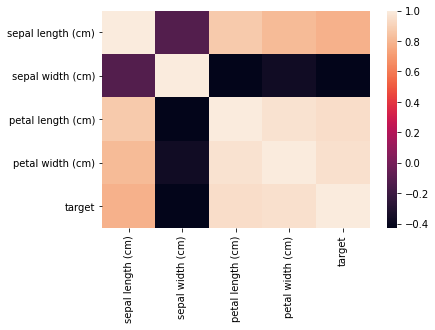

In [ ]:
from sklearn import datasets
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

iris = datasets.load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
sns.heatmap(df.corr(), 
            xticklabels=df.corr().columns.values,
            yticklabels=df.corr().columns.values)
plt.show()

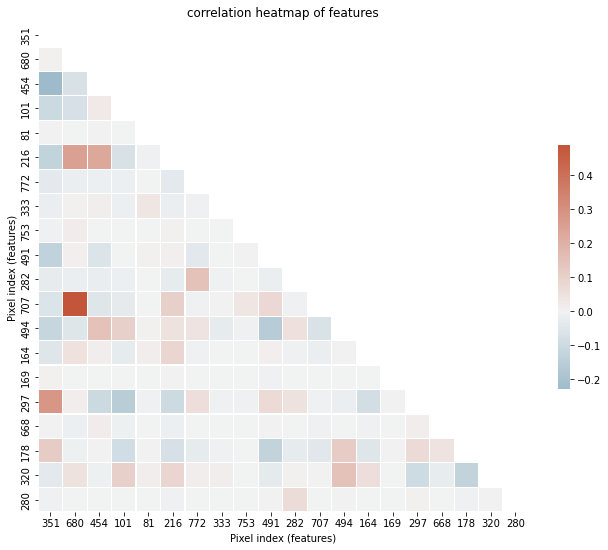

In [73]:
#######################################################
# TODO: Visualize the dataset
# I am plotting correlation matrix of part of the features in this dataset
# I randomly selected 20 features (pixel locations) to visualize
import seaborn as sns
import pandas as pd
d = pd.DataFrame(data=X,  columns= range(28*28))
corr = d.sample(20, axis = 1).corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.1, cbar_kws={"shrink": .5})
plt.title("correlation heatmap of features")
plt.xlabel("Pixel index (features)")
plt.ylabel("Pixel index (features)")
plt.savefig("out.jpg")
#######################################################

#### 10) What insights do you gain from this visualization about your dataset?

<font color='blue'>
    We can see that some pixels has correlations between them, but this correlation is not strong. Most of the pixels has nearly no corrlation (0), only a few has moderate correalations. This should not affect the learning much. It is possible for us to perform a PCA analysis first on the dataset to remove the correlations.
</font>

#### 11) In your dataset, what discussions would you have about the ethical implications of what you were collecting? Are there any potential issues with fairness? 

<font color='blue'>
    There are no ethical or fairness issues with my data. This is only classifying digits, and come from an open database.
</font>

## Part 3: Using your dataset

Things to do in this part:
1. Perform a train-validation-test split
2. Train a simple supervised learning algorithm on dataset
3. Hyper-parameter Tuning
4. Evaluation
5. Discussion

Now that you have created your dataset and explored some of its properties, you will use a supervised classifier to predict the outcome you definined in the problem statement. To evaluate how well this classifier predicts the outcomes, you will need to set some data aside for testing. First, you'll use sklearn to split the data into train and test sets, with 25% of the data reserved for testing.

In [75]:
from sklearn.model_selection import train_test_split 

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)
print(f'Training examples: {X_train.shape[0]}\nTesting examples: 
      {X_test.shape[0]}')

#######################################################
# TODO: Split the training data into training and validation splits. 
# You can use approximately 20% of the training data as our validation data set. 
# Train Validation Split
X_train, X_validation, y_train, y_validation = train_test_split(
    X_train, y_train, test_size=0.20, random_state=0)
print(f'Training examples: {X_train.shape[0]}\nValidation examples: 
      {X_validation.shape[0]}')

#######################################################

Training examples: 45000
Testing examples: 15000
Training examples: 36000
Validation examples: 9000


Now, we'll save your train and test sets. Together, these four files will make up the dataset you submit on Gradescope. 

In [76]:
import numpy as np 

np.savetxt("X_train.csv", X_train, delimiter=",")
np.savetxt("X_validation.csv", X_validation, delimiter=",")
np.savetxt("X_test.csv", X_test, delimiter=",")
np.savetxt("y_train.csv", y_train, delimiter=",")
np.savetxt("y_validation.csv", y_validation, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")

# zip together all components of your dataset
!zip homework1_dataset.zip X_train.csv X_test.csv y_train.csv y_test.csv

  adding: X_train.csv (deflated 98%)
  adding: X_test.csv (deflated 98%)
  adding: y_train.csv (deflated 96%)
  adding: y_test.csv (deflated 96%)


### Classifier Training

Now, let's train a Decision Tree classifier. You can train a decision tree for both regression or classification problem.  You are encouraged to use any popular packages such as sklearn. Here is the link to the scikit-learn site: https://scikit-learn.org/stable/modules/tree.html

In [79]:
#######################################################
# TODO: Train a decision tree on your dataset (This is a decision Tree Classifier)
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
#######################################################

### Hyperparameter Tuning

Background on hyperparameters:
Most any ML method has 'hyper' or 'run' parameters that the user can tune/adjust, modifying how the algorithm functions. The process of tweaking and optimizing these parameters to improve ML performance is known as [hyperparameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization). A hyperparameter sweep mostly commonly includes identifying which algorithm parameters are known to, or are likely to, impact performance on a given dataset, and then varying the setting of these one or more paramters in separate runs of the algorithm.  This step is not only important for squeezing the maximum performance out of ML methods, but also in fairly compairing the performance of different ML methods on given datasets.  

Out of necessity, almost all ML algorithms have default hyperparameters specified (related to [default arguments](https://en.wikipedia.org/wiki/Default_argument). First and foremost, default parameters are specified so that the algorithm is able to run even if the user forgets to specify these hyperparamters. They are often set with the intention of testing out the method on a 'toy' or demonstration dataset included with the software, or they are set as simple, accessible placeholders to ensure that the first time a user runs the software it runs smoothly and quickly. However, default parameters are certainly not guarenteed (if even likely) to lead to optimal ML performance on a given dataset. 

The most common and basic hyperparameter sweep strategies include a [grid search](https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998) or a [random search](https://en.wikipedia.org/wiki/Random_search), but other more sophisticated searches are also employed. 

Like with many other things in ML, there is no absolute right way to perform a hyperparameter sweep. One could easily waste a large amount of computational time on an exhaustive serach of hyperparameter settings and combinations without improving performance much, or at all. However, some degree of hyperparameter searching outside of using the default hyperparameter settings is considered essential to ML best practices. 


Now, let's train another classifier and tune its parameters to give it better performance. You are encouraged to try out a different algorithm than the one you used before and can use popular packages such as sklearn. We have provided some sample code on how grid search and random search can be used to tune parameters for Decision Trees below.

#### You are required to perform a grid search of at least two hyper-parameters of your model. Make sure that you have a way to identify the best hyperparameters for a given dataset and feature extraction method

#### Decision Tree - Random Sweep of Major Hyperparameters
Here you should consider some of the hyperparameters with the most potential to impact decision tree performance. 

* max_depth = The maximum depth of the tree. (default = None)
* min_samples_split = The minimum number of samples required to split an internal node: (default = 2)
* min_samples_leaf  = The minimum number of samples required to be at a leaf node. (default = 1)
* criterion = The function to measure the quality of a split. (Default = 'gini')

In [87]:
# Prepare a range/set of hyperparameter values for each
# param_grid = {"max_depth": [3, None], "min_samples_split": randint(2, 10), "min_samples_leaf": randint(1, 10), "criterion": ["gini", "entropy"]}

# model = tree.DecisionTreeClassifier(random_state=randSeed)
# Specifics of the random sweep - up to 100 randomly selected hyperparameter combinations
# hp_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=randSeed)
# hp_search.fit(X_validation, y_validation)

#######################################################
# TODO: Perform a hyperparameter search using your validation data on a classifier (the classifier can be the same structure as the one your have above)
# Prepare a range/set of hyperparameter values for each
from sklearn.model_selection import RandomizedSearchCV
param_grid = {"max_depth": [20, 10, 3, None], 
              "min_samples_split": range(2, 10), 
              "min_samples_leaf": range(1, 10), 
              "criterion": ["gini", "entropy"]}

model = tree.DecisionTreeClassifier(random_state=0)
#Specifics of the random sweep - up to 100 randomly selected hyperparameter combinations
hp_search = RandomizedSearchCV(estimator=model, 
                               param_distributions=param_grid, 
                               n_iter=100, random_state=0)
hp_search.fit(X_validation, y_validation)
print(hp_search.best_params_)
#######################################################


{'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}


In [90]:
# The best parameters are {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': None, 'criterion': 'entropy'}
# using them to train a new model
clf2 = tree.DecisionTreeClassifier(min_samples_split = 4, 
                                   min_samples_leaf = 2, 
                                   max_depth = None, 
                                   criterion = 'entropy')
clf2 = clf2.fit(X_train, y_train)


### Evaluation


Proper evaluation is critical to making good conclusions. Many metrics and measures of model 'goodness' exist. Part of what differentiates these evaluation methods is understanding the assumptions being made by a given metric, or what the metric prioritizes as important for model goodness. A nice review of key evaluation metrics can be found [here](http://www.davidsbatista.net/blog/2018/08/19/NLP_Metrics/). 

Below we will apply some different evaluation methods to the model that was trained using the 'optimal' parameter settings identified in the random sweep or grid search. All evaluations will focus on predictive performance on the testing data. 

The metrics are typically based on calculations using the different possible classification predictions that can be made: True Positives (TP), True Negative (TN), False Positive (FP), and False Negative (FN).  See [here](https://towardsdatascience.com/the-mystery-of-true-positive-true-negative-false-positive-and-false-negative-fd73c78c905a) to review TP, TN, FP, FN.


In [97]:
# Sample code for calculating TP, TN, FP and FN for a decision tree
#Calculate confusion matrix (true outcomes, predicted outcomes)
#TN, FP, FN, TP = confusion_matrix(y_test, dt_test_pred).ravel()

#print("TP = "+str(TP))
#print("FP = "+str(FP))
#print("FN = "+str(FN))
#print("TN = "+str(TN))

#######################################################
# Here, I choose class 1 as my target (positive) and all other classes negative
# TODO: Compute TP, TN, FP, FN of the simple classifer you trained and the classifier that you tuned
from sklearn.metrics import confusion_matrix
# simple classifer
dt_test_pred = clf.predict(X_test)
print("simple classifer:")
y_test_binary = y_test # binarize 
y_test_binary[y_test != 1] = 0
dt_test_pred_binary = dt_test_pred # binarize 
dt_test_pred_binary[dt_test_pred != 1] = 0
TN, FP, FN, TP = confusion_matrix(y_test_binary, 
                                  dt_test_pred_binary).ravel()
print("TP = "+str(TP))
print("FP = "+str(FP))
print("FN = "+str(FN))
print("TN = "+str(TN))
# tuned classifer
print("tuned classifer:")
dt_test_pred2 = clf2.predict(X_test)
dt_test_pred2_binary = dt_test_pred2 # binarize 
dt_test_pred2_binary[dt_test_pred2 != 1] = 0
[TN2, FP2, FN2, TP2] = confusion_matrix(y_test_binary, 
                                        dt_test_pred2_binary).ravel()
print("TP = "+str(TP2))
print("FP = "+str(FP2))
print("FN = "+str(FN2))
print("TN = "+str(TN2))
#######################################################

simple classifer:
TP = 1656
FP = 119
FN = 72
TN = 13153
tuned classifer:
TP = 1659
FP = 107
FN = 69
TN = 13165


| Model       | True Positive |True Negative| False Positive| False Negative
| :---        |    :----:   |           :----: |          :----: |          :----: |
| simple classifer     |    1656     |  13153        |     119        | 72 |                      
| tuned classifer     |     1659        |    13156           |       107         |     69            |               


These values (TP, FP, FN, TN) are components used to calculate a number of different evaluation metrics for classification tasks:

* Accuracy = (TP + TN)/(TP + TN + FP + FN)
* Precision (a.k.a. Sensitivity)= TP/(TP + FP)
* Recall (a.k.a. True Positive Rate) = TP/(TP + FN)
* Specificity = TN/(TN + FP)
* False Positive Rate = FP/(FP + TN)

* F1 Score = 2*(Precision * Recall)/(Precision + Recall)
* Balanced Accuracy = (Sensitivity + Specificity)/2



In [100]:
#######################################################
# TODO: Compute the accuracy, precision, recall etc. of the simple classifer you trained and the classifier that you tuned
print("simple classifer:")
Accuracy = (TP + TN)/(TP + TN + FP + FN)
Precision = Sensitivity = TP/(TP + FP)
Recall = TP/(TP + FN)
Specificity = TN/(TN + FP)
False_Positive_Rate = FP/(FP + TN)
F1_Score = 2*(Precision * Recall)/(Precision + Recall)
Balanced_Accuracy = (Sensitivity + Specificity)/2
print("Accuracy = "+str(Accuracy))
print("Precision = "+str(Precision))
print("Recall = "+str(Recall))
print("Specificity = "+str(Specificity))
print("False Positive Rate = "+str(False_Positive_Rate))
print("F1 Score = "+str(F1_Score))
print("Balanced Accuracy = "+str(Balanced_Accuracy))
print("tuned classifer:")
Accuracy2 = (TP2 + TN2)/(TP2 + TN2 + FP2 + FN2)
Precision2 = Sensitivity2 = TP2/(TP2 + FP2)
Recall2 = TP2/(TP2 + FN2)
Specificity2 = TN2/(TN2 + FP2)
False_Positive_Rate2 = FP2/(FP2 + TN2)
F1_Score2 = 2*(Precision2 * Recall2)/(Precision2+ Recall2)
Balanced_Accuracy2 = (Sensitivity2 + Specificity2)/2
print("Accuracy = "+str(Accuracy2))
print("Precision = "+str(Precision2))
print("Recall = "+str(Recall2))
print("Specificity = "+str(Specificity2))
print("False Positive Rate = "+str(False_Positive_Rate2))
print("F1 Score = "+str(F1_Score2))
print("Balanced Accuracy = "+str(Balanced_Accuracy2))

#######################################################

simple classifer:
Accuracy = 0.9872666666666666
Precision = 0.9329577464788732
Recall = 0.9583333333333334
Specificity = 0.9910337552742616
False Positive Rate = 0.008966244725738396
F1 Score = 0.9454753068798173
Balanced Accuracy = 0.9619957508765674
tuned classifer:
Accuracy = 0.9882666666666666
Precision = 0.9394110985277463
Recall = 0.9600694444444444
Specificity = 0.9919379144062689
False Positive Rate = 0.008062085593731163
F1 Score = 0.9496279336004578
Balanced Accuracy = 0.9656745064670076


| Model       | Accuracy |Precision| Recall| Specificity | False Positive Rate | F1 Score | Balanced Accuracy
| :---        |    :----:   |           :----: |          :----: |          :----: | :----:       | :----:       | :----:       |
| simple classifer    |   0.9873          |     0.9330          |        0.9583        |       0.9910         |   0.0090       |        0.9455     | 0.9620
| tuned classifer      |  0.9883           |    0.9394           |     0.9601           |   0.9919             |  0.0081        |    0.9496 |  0.9657

### ROC Curve and AUC metric 
The ROC curve is a metric used for the evaluation of binary classification models, where we evaluate how the model would perform if different cutoff thresholds (of predicted class probability) between the two classes were considered. This is useful when we don't necessarily know which class is more important to predict accurately. For example, if we wanted to evaluate how well a test for a highly infectious disease worked, we would care much more about identifying positive individuals correctly than negative individuals, even at the expense of additional false positives.

To calculate a ROC curve first we need to get the class prediction probabilites from the model, rather than just the predicted classes, since these predicted classes were decided based on a predetermined classification threshold.

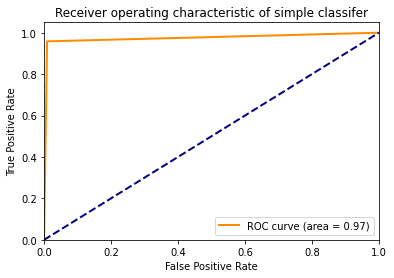

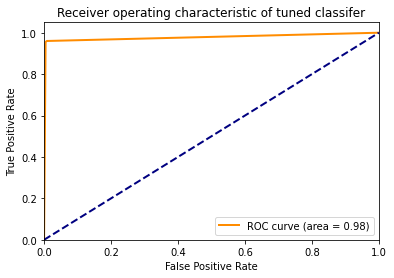

In [111]:
# Sample code for you to calculate ROC
#Determine probabilities of class predictions for each test instance (this will be used much later in calculating an ROC curve)
#probas_ = dt.fit(x_train_fs, y_train).predict_proba(x_test_fs)

# Compute ROC curve and area the curve
#fpr, tpr, thresholds = metrics.roc_curve(y_test, probas_[:, 1])
#roc_auc = auc(fpr, tpr)

#Plot the ROC Curve and include AUC in figure. 
#plt.figure()
#lw = 2
#plt.plot(fpr, tpr, color='darkorange',
#         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
#plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic example')
#plt.legend(loc="lower right")
#plt.show()

#######################################################
# TODO: Visualize the ROC and AUC for your models
from sklearn.metrics import roc_curve,auc 

probas_ = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test_binary, probas_[:, 1]) # as we are using label 1 as positive
roc_auc = auc(fpr, tpr)

#Plot the ROC Curve and include AUC in figure. 
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of simple classifer')
plt.legend(loc="lower right")
plt.show()

probas_ = clf2.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test_binary, probas_[:, 1]) # as we are using label 1 as positive
roc_auc = auc(fpr, tpr)

#Plot the ROC Curve and include AUC in figure. 
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic of tuned classifer')
plt.legend(loc="lower right")
plt.show()
#######################################################

#### Discussion questions:

1.   Which classifer performed better? Why? 
    <br><br>
    <font color='blue'>
    The tuned classifier performed better. This is because the tuned classifier has more true positive and true negative than the simple classifier, and also less false positive and false negative. Moreover, tuned classifier has higher Accuracy, Recall, Specificity, F1 Score, Balanced Accuracy and lower False Positive Rate. From the ROC and AUC, we can also see that the tuned classifier has higher AUC, and its ROC curve is more to the upper left than that of simple classifier, indicating a better performance.
</font>
<br><br>
2. What other methods could you do to increase the performance of your model on a held out test set?
<br><br>
    <font color='blue'>
    We can also: 1. Increase general size of the data (both training and testing set get larger). 2. improve the balance of classes in training set. 3. Remove correlations using PCA before training. 4. Improve the representative of the data (i.e. insure the data is not biased and contains more possible feature combinations)
</font>
<br><br>




## Feedback

Please provide us with some feedback on how long each section or this homework overall took you. Any other feedback is also welcomed. 

## Submit
Great work! You're all done.

Make sure to submit this Python notebook (as a PDF) and the dataset you created as a zip file. See the homework writeup for directions.